# Scatter Plots

In the previous lecture, I introduced the `plot` function, which generates a series of points which get rendered against an `Axes` object.
Matplotlib actually has a number of useful plotting methods in the scripting layer which correspond to different kinds of plots we might want to use. We are not going to go through all of them here but we'll touch on a few of the major ones. Regardless, there are a few things to keep in mind which we learned in the previous lecture. 
1. First, pyplot is going to retrieve the current figure with the function `gcf` and then get the current axis with the function `gca`. Pyplot is keeping track of the axis objects for you. But don't forget that they're there and we can get them when we want to get them.
2. Second, pyplot just mirrors the API of the `Axes` objects. So you can call the `plot` function against the pyplot module, and this is just calling the axis plot functions underneath.
3. Finally, remember that the function declaration from most of the functions in matplotlib end with an open set of keyword arguments. There are a lot of different properties you can control through these keyword arguments, and you won't find them described for each function in the docs. That can be a bit frustrating because you end up having to learn from examples.

I'll start peppering in some of them this week to demonstrate that the matplotlib documentation is really key in gaining a full understanding of the options available.

With that in mind let's move on to talk first about scatter plots.

A scatter plot is a two-dimensional plot similar to the line plots I've shown. The scatter function takes an x-axis value as a first argument and y-axis value as the second. If the two arguments are the same, we get a nice diagonal alignment of points.

In [1]:
# Let's bring in the scripting interface
import matplotlib.pyplot as plt

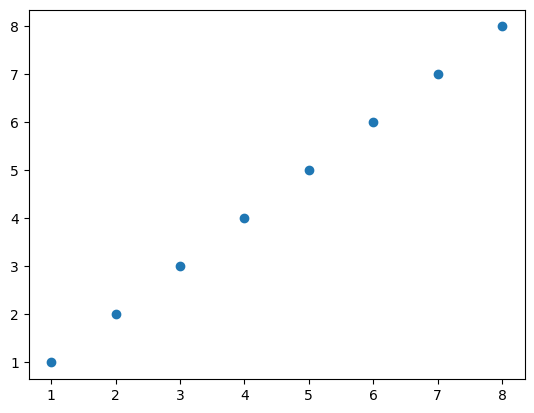

In [2]:
# I'll bring in numpy as we're going to use it later and matplotlib is really based on numpy arrays. 
import numpy as np

# Now let's create some fake data
x = np.array([1,2,3,4,5,6,7,8])
y = x

# Let's create a new figure
plt.figure()
# And now let's get matplotlib to produce a scatter plot. This is similar to plt.plot(x, y, '.'), but
# the underlying child objects in the axes are not Line2D
plt.scatter(x, y); 

Now, `scatter` doesn't represent items as a series as `plot` did, instead, we can pass it a list of colors which correspond to given points. Let's use some list arithmetic to create a new list just short of the number of data points we need and set all of the values to green. Then we'll add a final value of red.



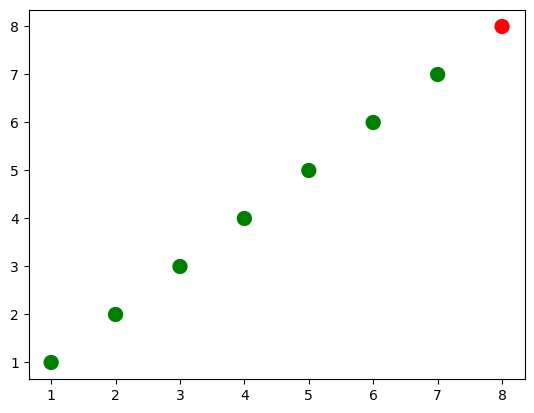

In [3]:
#Some new fake data
x = np.array([1,2,3,4,5,6,7,8])
y = x

# create a list of colors for each point to have
# ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'red']
colors = ['green']*(len(x)-1)
colors.append('red')

# create our new figure
plt.figure()

# plot the point with size 100 and our chosen color list
plt.scatter(x, y, s=100, c=colors);

The separation of data points into lists, which describes them as components is a pretty common pattern in matplotlib. You have some set of items, but they're actually described as the same slice across many different data sources.

Those who are familiar with object programming might expect that each data point is represented with its own instance, which encapsulates all of its properties. For instance, a point has an x value and a y value and a color and a size. That's not the case here. This is where it's useful to have some knowledge of list comprehensions and lambdas as we talked about in the first course. Also important is the zip function and list unpacking. And because this is so common in the Python data science world, I'm going to take a brief aside and talk about that here.

Recall that the zip method takes a number of iterables and creates tuples out of them, matching elements based on index. So if we have two lists of numbers, zip will take the first from each and create a tuple, then the second from each and create a tuple, and so on.

Also remember that zip has lazy evaluation because it's actually a generator in Python 3 which means we need to use the `list` function if we want to see the results of iterating over zip.

Let's demonstrate. Here we'll create a new zip generator with a zip function passing in two lists of numbers. When we convert this generator to a list, we see there's a list of pairwise tuples.

In [4]:
# convert the two lists into a list of pairwise tuples
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])

print(list(zip_generator))
# the above prints:
# [(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]

# let's do that again, but this time let's use unpacking instead of list
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# The single star * unpacks a collection into positional arguments
print(*zip_generator)
# the above prints:
# (1, 6) (2, 7) (3, 8) (4, 9) (5, 10)

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]
(1, 6) (2, 7) (3, 8) (4, 9) (5, 10)


Storing point data as tuples is common and you should be familiar with being able to convert data to and from this form. If we want to turn the data back into two lists, one with the x component and one with the y component, we can use parameter unpacking with zip.

When you pass a list or an iterable  to a function and prepend it with an asterisk, each item is taken out of the iterable and passed as a separate argument.

So that's a brief aside on a valuable tool which you will see when manipulating and cleaning data in the wild. Now, let's get back to plotting. Let's take these two lists and plot them to a new figure using scatter. Instead of plotting them as one data series, we'll slice the lists and plot them as two data series.

Instead of setting a color per datapoint, we can color each series with a single value if we want to. We can also do things like change the color or transparency of an entire series. We can also add a descriptive label as well.

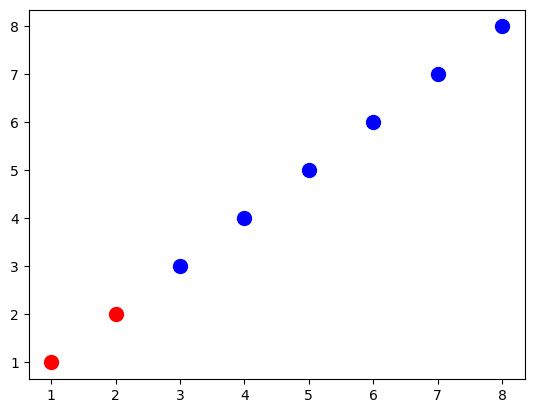

In [5]:
#Create a blank figure
plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students');

You'll notice that the label didn't show, at the moment it's just held internally for each series, and I'll get to that in a minute, but let's talk a bit more about the properties of axis.

The axes generally have labels to them to explain what they represent or the units that they describe. Charts tend to have titles as well, so let's put this in place and, since pyplot mirros much of the API of the axes objects, we can make calls directly with pyplot.

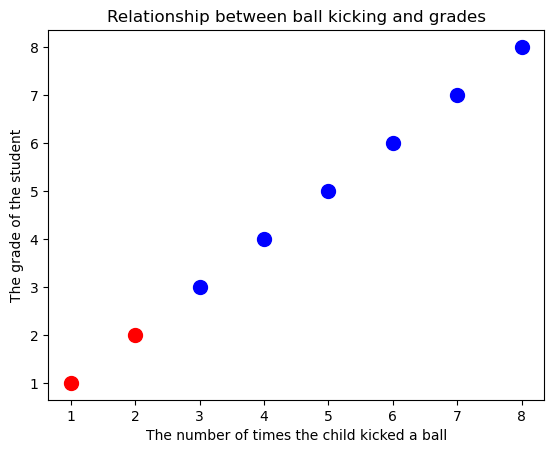

In [6]:
plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students');

# add a label to the x axis
plt.xlabel('The number of times the child kicked a ball')
# add a label to the y axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between ball kicking and grades');

And let's add a legend as well. You'll see that matplotlib places this in the upper left hand corner and puts a little visual about our data series there.

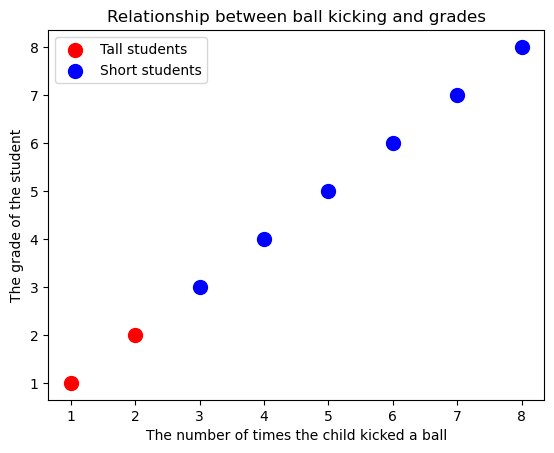

In [7]:
plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students');

# add a label to the x axis
plt.xlabel('The number of times the child kicked a ball')
# add a label to the y axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between ball kicking and grades');
# add a legend (uses the labels from plt.scatter)
plt.legend();

In the docs for the legend, you'll see that there are a number of different parameters and one of them is called lock. And a value of 4, we'll put it in the lower right hand corner of the axis.

We could also get rid of the frame and add a title, and do any number of different transformations.

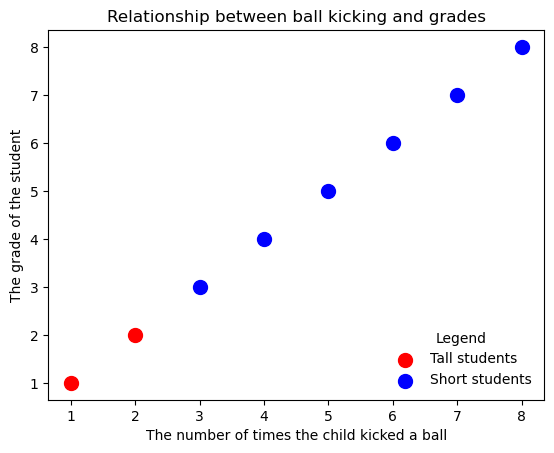

In [8]:
f=plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students');

# add a label to the x axis
plt.xlabel('The number of times the child kicked a ball')
# add a label to the y axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between ball kicking and grades');
# add the legend to loc=4 (the lower right hand corner), also gets rid of the frame and adds a title
plt.legend(loc=4, frameon=False, title='Legend');

Now, all of the things I've been showing you are renderable objects associated with the axes. The legend, for instance, is an artist, which means it can contain children. Let's take advantage of this and write a little routine to recursively go through the list of children in an artist.

In [9]:
# First, we'll import the artist class from matplotlib.
from matplotlib.artist import Artist

# Then we'll make a recursive function which takes in an artist and some depth parameter.
def rec_gc(art, depth=0):
    # Then checks if the object is an artist and if so, prints out its string name.
    if isinstance(art, Artist):
        # increase the depth for pretty printing
        print("  " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)

# Call this function on the legend artist to see what the legend is made up of
rec_gc(f.legend())

Legend
            Text(0, 0, '')
                        Text(0, 0, 'Tall students')
                        Text(0, 0, 'Short students')
    FancyBboxPatch((0, 0), width=1, height=1)


So you can see the legend artist is just made up of a number of different offsetboxes for drawing, as well as TextAreas and PathCollections.

What I want you to take away from this is that there is nothing magical about what matplotlib is doing. Calls to the scripting interface, just create figures, subplots, and axis. Then load those axis up with various artists, which the back-end renders to the screen or some other medium like a file.

While you'll spend 95% of your time at the scripting layer, happily creating graphs and charts, it's important to understand how the library works underneath for the other 5% of the time.

And the time that you will use this is when you really want to have control over and to create your own charting functions, and you'll have a chance to do that by the end of this course.

In the next lecture, we'll go back into line plots and create a few more then onto bar charts.